In [ ]:
# 7 Feature Encoding Techniques

## 1. Encoding
### 1.1. LabelEncoding

In [1]:
import pandas as pd

# load dataset - census income
census_income = pd.read_csv(r'./datasets/train.csv')
print(census_income.shape)
print(census_income.info())
print(census_income.head(5))


(43957, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB
None
   age  workclass  fnlwgt     education  educational-num   

In [2]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(census_income["education"])
census_income["education_labeled"] = le.transform(census_income["education"])
display(census_income[["education", "education_labeled"]])

,education,education_labeled
0,Doctorate,10
1,12th,2
2,Bachelors,9
3,7th-8th,5
4,Some-college,15
...,...,...
43952,Bachelors,9
43953,HS-grad,11
43954,Some-college,15
43955,Bachelors,9


In [4]:
education_labels_sorted = {"HS-grad": 1, "Bachelors": 2, "Masters": 3, "Doctorate": 4}
census_income['education_labeled_sorted'] = census_income['education'].map(education_labels_sorted)
education_sorted_labeled = census_income[["education", "education_labeled_sorted", "income_>50K"]]

# calculate percentage of income_>50k
education_sorted_labeled_grouped = education_sorted_labeled[~education_sorted_labeled["education_labeled_sorted"].isnull()].groupby(by=["education"]).mean().sort_values(by=["education_labeled_sorted"])
education_sorted_labeled_grouped

,education_labeled_sorted,income_>50K
education,,
HS-grad,1.0,0.156653
Bachelors,2.0,0.414046
Masters,3.0,0.555184
Doctorate,4.0,0.716418


### 1.2 OneHotEncoding
Es practicamente obligatorio en los modelos con las variables categóricas (si se nos ocurre un orden, LabelEncode())

In [5]:
#Implementación 1. get_dummies()
from sklearn import preprocessing
import pandas as pd

education_one_hot_pandas = pd.get_dummies(census_income["education"], prefix='education')
education_one_hot_pandas

,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
43953,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
43954,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
43955,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [6]:
#2. Una manera mejor y como lo usamos en los pipelines
from sklearn.preprocessing import OneHotEncoder
from seaborn import load_dataset

ohe = OneHotEncoder()
ohe.fit(census_income[['education']])

education_one_hot_sklearn = pd.DataFrame(ohe.transform(census_income[["education"]]).toarray(), columns=ohe.categories_[0])
education_one_hot_sklearn.head(3)

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
print(census_income.head(3))

   age workclass  fnlwgt  education  educational-num      marital-status  \
0   67   Private  366425  Doctorate               16            Divorced   
1   17   Private  244602       12th                8       Never-married   
2   31   Private  174201  Bachelors               13  Married-civ-spouse   

        occupation   relationship   race gender  capital-gain  capital-loss  \
0  Exec-managerial  Not-in-family  White   Male         99999             0   
1    Other-service      Own-child  White   Male             0             0   
2  Exec-managerial        Husband  White   Male             0             0   

   hours-per-week native-country  income_>50K  education_labeled  \
0              60  United-States            1                 10   
1              15  United-States            0                  2   
2              40  United-States            1                  9   

   education_labeled_sorted  
0                       4.0  
1                       NaN  
2              

## 2. Hashing
Cuadno el OneHot Encoding crea demasiadas columnas podemos recurria a Hashing

In [9]:
from sklearn.feature_extraction.text import HashingVectorizer
import sklearn 
import pandas as pd

# load data set
census_income = pd.read_csv(r'./datasets/train.csv')
education_feature = census_income.groupby(by=["education"]).count().reset_index()["education"].to_frame()
education_feature

,education
0,10th
1,11th
2,12th
3,1st-4th
4,5th-6th
5,7th-8th
6,9th
7,Assoc-acdm
8,Assoc-voc
9,Bachelors


In [10]:
# define Feature Hashing Vectorizer
vectorizer = HashingVectorizer(n_features=8, norm=None, alternate_sign=False, ngram_range=(1,1), binary=True)

# fit the hashing vectorizer and transform the education column
X = vectorizer.fit_transform(education_feature["education"])

# transformed and raw column to data frame
df = pd.DataFrame(X.toarray()).assign(education = education_feature["education"])
display(df)

,0,1,2,3,4,5,6,7,education
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10th
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11th
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12th
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1st-4th
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5th-6th
5,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,7th-8th
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9th
7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Assoc-acdm
8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Assoc-voc
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Bachelors


In [ ]:
import pandas as pd
from sklearn.feature_extraction import FeatureHasher

# Asegura strings y sin NaN
test = pd.DataFrame({'type': pd.Series(education_feature["education"]).fillna("NA").astype(str)})

# Iterable de iterables: [["BSc"], ["PhD"], ...]
X_iter = test['type'].apply(lambda s: [s]).to_list()

h = FeatureHasher(n_features=8, input_type='string')
f = h.transform(X_iter)          # fit no hace falta: es un transf. sin estado
df = pd.DataFrame(f.toarray(), columns=[f"h{i}" for i in range(8)])
df.head()

,h0,h1,h2,h3,h4,h5,h6,h7
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Conclusión** Posibles problemas de colisiones si elegimos pocas dimensiones. HashingVectorizer más para NLP. FeatureHasher más para ML genérico

## 3. Binning / Bucketizing
Hay muchas maneras de implementarlo: Pandas, TensorFlow, SKlearng, **Pipeline**, 

In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = census_income[['age']].copy()

pipe = Pipeline([
    ('bin', KBinsDiscretizer(n_bins=[3], encode='ordinal', strategy='uniform')),  # o 'quantile'
    ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

Z = pipe.fit_transform(X)

buckets_df = pd.DataFrame(Z, columns=['age<30', '30<age<50', 'age>50'])
buckets_df = buckets_df.assign(age=census_income['age'])

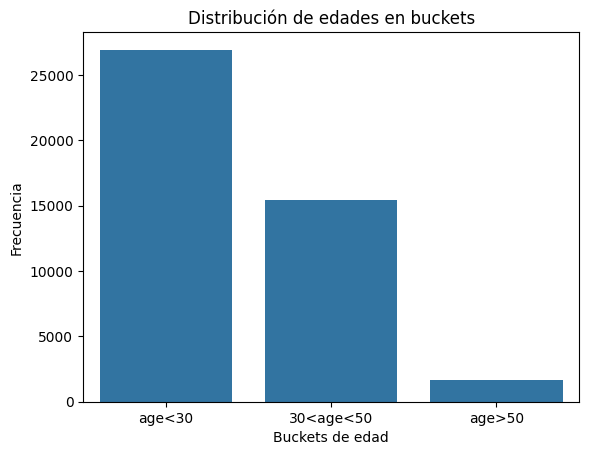

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
# Sumamos por columnas: cuántos caen en cada bucket
bucket_counts = buckets_df.drop(columns="age").sum(axis=0)
sns.barplot(x=bucket_counts.index, y=bucket_counts.values)
plt.title("Distribución de edades en buckets")
plt.xlabel("Buckets de edad")
plt.ylabel("Frecuencia")
plt.show()

In [33]:
print(census_income.columns)


Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'],
      dtype='object')


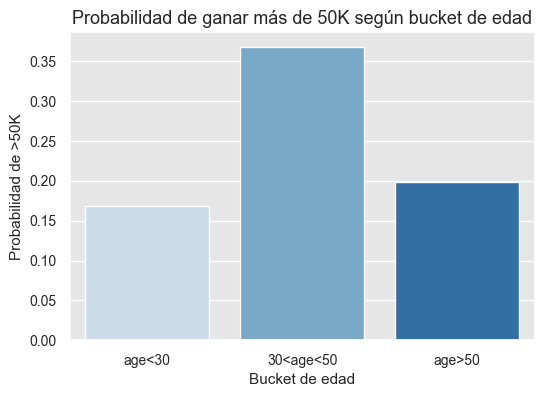

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar contexto: "paper", "notebook", "talk", "poster"
sns.set_context("notebook", font_scale=1.0)  # escala normal de Jupyter

plt.figure(figsize=(6,4))
sns.barplot(x="bucket", y="prob_gt50K", hue="bucket", data=probs_df, palette="Blues", legend=False)


plt.ylabel("Probabilidad de >50K", fontsize=11)
plt.xlabel("Bucket de edad", fontsize=11)
plt.title("Probabilidad de ganar más de 50K según bucket de edad", fontsize=13)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


## 4 Transformaciones
### 4.1 Log1p
### 4.2. Box-cox

## 5 Normalize / Standardize
### 5.1 MinMaxScaler()
### 5.2. StandardScaler()

La manera mejor de hacerlo es incluirlo en **pipelines**

## 6 Feature Crossing
### 6.1 PolynomialFeatures()
### 6.2 Kernel

In [27]:
from sklearn.datasets import make_circles
from sklearn import preprocessing
from plotly.offline import plot
import plotly_express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy
import plotly_express as px

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.rcParams['font.size'] = '30'

# generate a data set
X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X = preprocessing.scale(X)

X=X[500:]
y=y[500:]

# define target value, here: binary classification, class 1 or class 2
y=np.where(y==0,"class 1","class 2")

# define x1 and x2 of a 2-dimensional data set
x1 = X[:,0]
x2 = X[:,1]


# define the kernel function
kernel = x1*x2 + x1**2 + x2**2

circle_df = pd.DataFrame(X).rename(columns={0:"x1", 1:"x2"})
circle_df = circle_df.assign(y=y)

color_discrete_map = {circle_df.y.unique()[0]: "black", circle_df.y.unique()[1]: "#f3d23a"}
px.scatter(circle_df, x="x1", y="x2", color="y", color_discrete_map = color_discrete_map, width=1000, height=800)

# plot the data set together with the kernel value in a 3-dimensional space
color_discrete_map = {circle_df.y.unique()[0]: "black", circle_df.y.unique()[1]: "grey"}
fig = px.scatter(circle_df, x="x1", y="x2", color="y", color_discrete_map = color_discrete_map, width=1000, height=600)
fig.update_layout(
    font=dict(
        family="Arial",
        size=24,  # Set the font size here
        color="Black"
    ),
    showlegend=True,
    width=1000,
    height=600,
)

plot(fig)

'temp-plot.html'

In [28]:
import plotly_express as px
from plotly.offline import plot

# define the kernel function
kernel = x1*x2 + x1**2 + x2**2

kernel_df = pd.DataFrame(X).rename(columns={0:"x1", 1:"x2"})
kernel_df = kernel_df.assign(kernel=kernel, y=y)

# plot the data set together with the kernel value in a 3-dimensional space
color_discrete_map = {kernel_df.y.unique()[0]: "black", kernel_df.y.unique()[1]: "grey"}

fig = px.scatter_3d(
    kernel_df,
    x="x1", y="x2", z="kernel",
    color="y",
    color_discrete_map=color_discrete_map,
    width=1000,
    height=600
)

# abrir en navegador
plot(fig)

'temp-plot.html'

## 7. PCA. Principal Component Analysis

In [22]:

from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import math

import pandas as pd

# Load the Iris dataset
iris_data = pd.read_csv(r'./datasets/Iris.csv')
iris_data.dropna(how="all", inplace=True) # drops the empty line at file-end

In [29]:
import plotly.io as pio
# Elige uno según tu entorno:
# pio.renderers.default = "notebook_connected"   # Jupyter clásico
# pio.renderers.default = "vscode"               # VS Code
pio.renderers.default = "browser"                # Siempre abre en el navegador

color_discrete_map = {iris_data.Species.unique()[0]: "black", iris_data.Species.unique()[1]: "#f3d23a", iris_data.Species.unique()[2]:"grey"}

px.scatter_3d(iris_data, x="PetalLengthCm", y="PetalWidthCm", z="SepalLengthCm", size="SepalWidthCm", color="Species", color_discrete_map = color_discrete_map, width=1000, height=800)

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib
import plotly.graph_objects as go

# define X
X = iris_data[["PetalLengthCm", "PetalWidthCm", "SepalLengthCm", "SepalWidthCm"]]

# fit PCA and transform X
pca = PCA(n_components=2).fit(X)
X_transform = pca.transform(X)
iris_data_trans = pd.DataFrame(X_transform).assign(Species = iris_data.Species).rename(columns={0:"PC1", 1:"PC2"})

# plot 2d plot
color_discrete_map = {iris_data.Species.unique()[0]: "black", iris_data.Species.unique()[1]: "#f3d23a", iris_data.Species.unique()[2]:"grey"}
fig = px.scatter(iris_data_trans, x="PC1", y="PC2", color="Species", color_discrete_map = color_discrete_map)

fig.update_layout(
    font=dict(
        family="Arial",
        size=24,  # Set the font size here
        color="Black"
    ),
    showlegend=True,
    width=1200,
    height=800,
)

In [31]:
print("Varianza explicada:", pca.explained_variance_ratio_)
print("Varianza total explicada:", pca.explained_variance_ratio_.sum())

Varianza explicada: [0.92461621 0.05301557]
Varianza total explicada: 0.9776317750248054


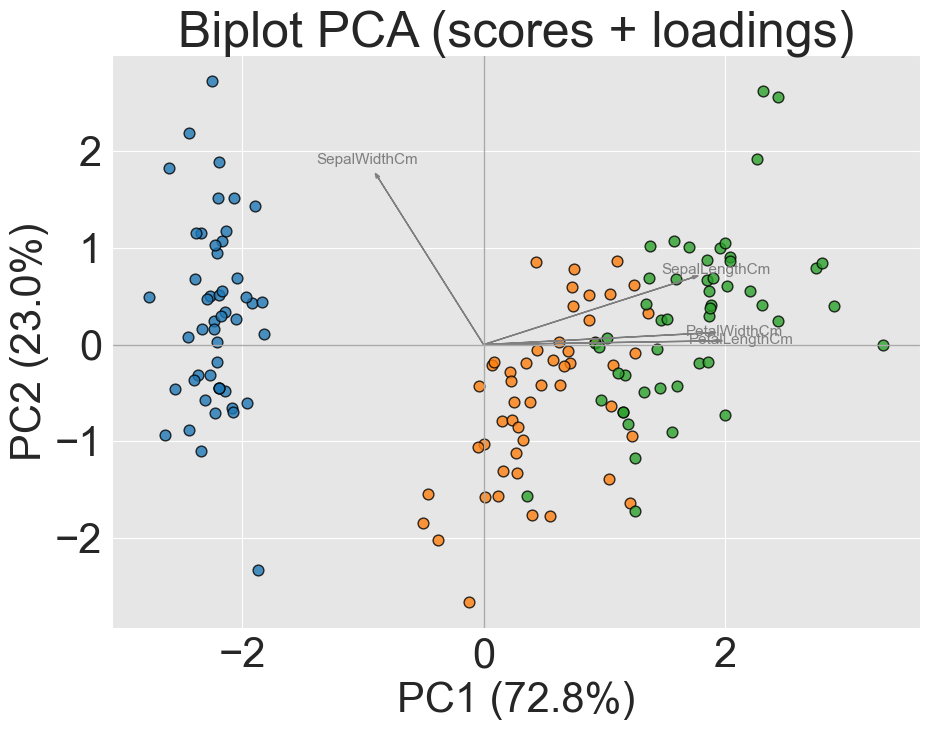

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# --- Datos: usa tus columnas numéricas del iris ---
X = iris_data[["PetalLengthCm", "PetalWidthCm", "SepalLengthCm", "SepalWidthCm"]].copy()
y = iris_data["Species"].astype(str).values

# 1) Estandarizar
Z = StandardScaler().fit_transform(X)

# 2) PCA (2 componentes)
pca = PCA(n_components=2).fit(Z)
scores = pca.transform(Z)                        # coordenadas de las muestras (PC space)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)  # vectores de variables

# 3) Escalado de flechas para que quepan en la figura
#    (ajustamos flechas a ~60% del rango de los scores)
scale = 0.6 * np.max(np.abs(scores))
max_loading = np.max(np.sqrt((loadings**2).sum(axis=1)))
loadings_scaled = loadings / max_loading * scale

# 4) Plot
plt.figure(figsize=(10,8))

# puntos por especie
for sp in np.unique(y):
    mask = (y == sp)
    plt.scatter(scores[mask, 0], scores[mask, 1], s=60, edgecolor="k", alpha=0.8, label=sp)

# flechas (variables)
for i, var in enumerate(X.columns):
    x0, y0 = 0, 0
    x1, y1 = loadings_scaled[i, 0], loadings_scaled[i, 1]
    plt.arrow(x0, y0, x1, y1, color="tab:gray", width=0.0, head_width=0.08*scale/5, length_includes_head=True)
    plt.text(x1*1.08, y1*1.08, var, fontsize=11, ha="center", va="center", color="tab:gray")

# ejes y leyenda
expl = pca.explained_variance_ratio_ * 100
plt.xlabel(f"PC1 ({expl[0]:.1f}%)")
plt.ylabel(f"PC2 ({expl[1]:.1f}%)")
plt.axhline(0, color="#aaa", lw=1)
plt.axvline(0, color="#aaa", lw=1)
#plt.legend(title="Species")
plt.title("Biplot PCA (scores + loadings)")
plt.tight_layout()
plt.show()